# Machine Learning Lab One


#### Rajakaruna M.M.P.N.
#### E/19/306

## 1 Random Numbers and Uni-variate Densities

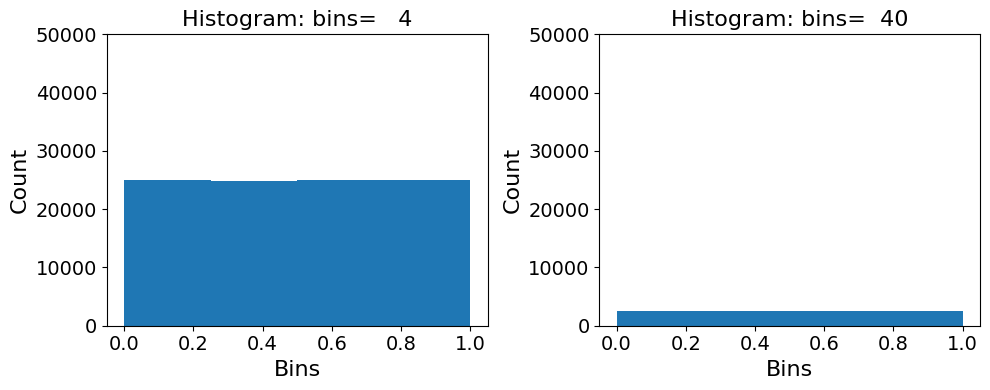

In [101]:
import matplotlib.pyplot as plt
import numpy as np
x = np.random.rand(100000,1)
# x = np.random.rand(1000,1)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10,4))
n1bins, n2bins = 4, 40
ax[0].hist(x, bins=n1bins)
ax[0].set_ylim(0,50000)
ax[0].set_xlabel("Bins", fontsize=16)
ax[0].set_ylabel("Count", fontsize=16)
ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[0].set_title("Histogram: bins=%4d"%(n1bins), fontsize=16)
ax[1].hist(x, bins=n2bins)
ax[1].set_ylim(0,50000)
ax[1].set_xlabel("Bins", fontsize=16)
ax[1].set_ylabel("Count", fontsize=16)
ax[1].tick_params(axis='both', which='major', labelsize=14)
ax[1].set_title("Histogram: bins=%4d"%(n2bins), fontsize=16)
plt.savefig("histograms_uniform.png")
plt.tight_layout()

#### Though the data is from a uniform distribution, the histogram does not appear flat. Why?

  Histograms divide the range of data into intervals called bins and count the number of data points falling into each bin.
  The appearance of a histogram can vary depending on the number of bins chosen. Fewer bins can lead to wider intervals and less detail, while more bins can lead to narrower intervals and more detail.
  In the given code, two histograms are plotted with different numbers of bins: 4 bins and 40 bins.
  When you have a small number of bins(like 4), each bin covers a wide range of data and it cause the datagram looks not flat. Only gets flat within each range separately. If we choose bins value as 1, the histogram gets completly flat.   
  But with a larger number of bins(like 40), covers a narrow range of data. This can leads to a more spiked appearence to the histogram which is not flat.

  If we increase the size of the data, both histograms appear flat. 

#### Every time you run it, the histogram looks slightly different? Why?
  The np.random.rand() function generates random numbers from a uniform distribution between 0 and 1.
  Each time the code is executed, a new set of data is generated. 

### Let us now add and subtract some uniform random numbers:

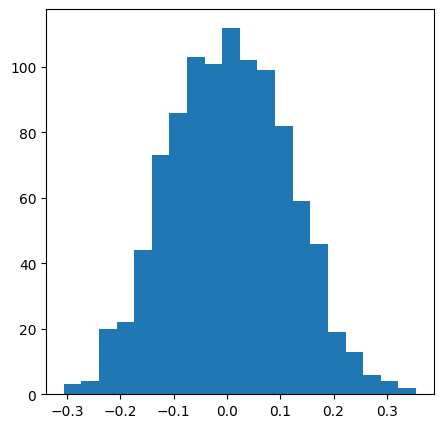

In [52]:
import matplotlib.pyplot as plt
import numpy as np

N = 1000
x1 = np.zeros(N)
count=0
for n in range(N):
    x1[n] = np.sum(np.random.rand(12,1))/12 - np.sum(np.random.rand(12,1))/12
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(x1, bins=20)
plt.show()


##### What do you observe? How does the resulting histogram change when you change the number of uniform random numbers you add and subtract? Is there a theory that explains your observation?

Resulting histogram appears more closly to the normal distribution around 0.
If we increase the no of sample size or no of samples, resulting histogram more closely resemble a normal distribution. 

Theory:
The observed behavior is consistent with the Central Limit Theorem (CLT). The CLT states that the sum (or average) of a large number of independent and identically distributed random variables(>30) tends towards a normal distribution, regardless of the shape of the original distribution, as long as the variance is finite. 

When I increase the no of samples(N) or no of random numbers that subtracted or added, the resulting distribution of the sum tends to become more normal due to the CLT. Because of we substracted the average of the two samples the resulting histogram symmetric around 0.
Thats why resulting histogram has a bell shape and symmetric around the 0.  

## 2 Uncertainty in Estimation

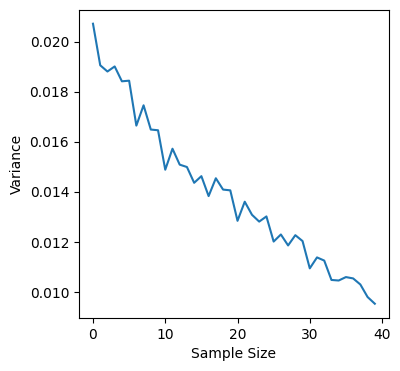

In [61]:
import matplotlib.pyplot as plt
import numpy as np

MaxTrial = 2000
sampleSizeRange = np.linspace(100, 200, 40)
plotVar = np.zeros(len(sampleSizeRange))
for sSize in range(len(sampleSizeRange)):
     numSamples = int(sampleSizeRange[sSize])
     vStrial = np.zeros(MaxTrial)
     for trial in range(MaxTrial):
        xx = np.random.randn(numSamples,1)
        vStrial[trial] = np.var(xx)
     plotVar[sSize] = np.var(vStrial)
fig, ax = plt.subplots(figsize=(4,4))
ax.plot((plotVar))
ax.set_xlabel('Sample Size')
ax.set_ylabel('Variance')
plt.show() 

Overall, this code helps analyze how the variability of sample variances changes as the sample size increases. It's an empirical exploration of how sample variance behaves under different sample size conditions.
When sample size increase varience decrease 


## 3 Bi-variate Gaussian Distribution

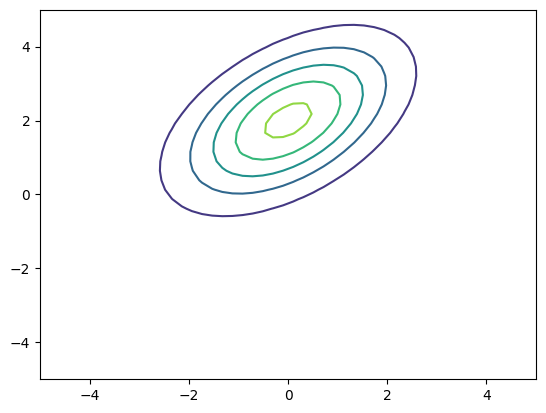

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def gauss2D(x, m, C):
    Ci = np.linalg.inv(C)
    dC = np.linalg.det(C1)
    num = np.exp(-0.5 * np.dot((x-m).T, np.dot(Ci, (x-m))))
    den = 2 * np.pi * dC
    return num/den

def twoDGaussianPlot (nx, ny, m, C):
    x = np.linspace(-5, 5, nx)
    y = np.linspace(-5, 5, ny)
    X, Y = np.meshgrid(x, y, indexing='ij')
    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])
            Z[i,j] = gauss2D(xvec, m, C)
    return X, Y, Z

# Plot contours
#
nx, ny = 50, 40
m1 = np.array([0,2])
C1 = np.array([[2,1], [1,2]], np.float32)
Xp, Yp, Zp = twoDGaussianPlot (nx, ny, m1, C1)
plt.contour(Xp, Yp, Zp, 5)

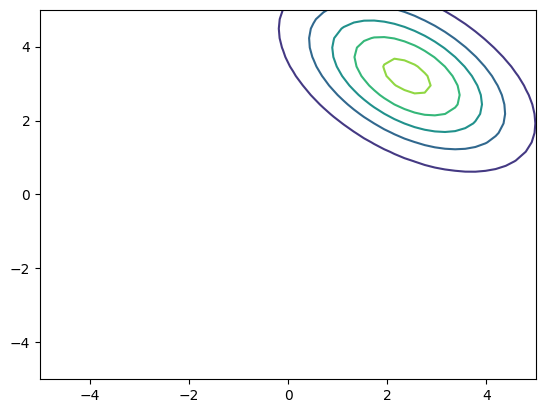

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def gauss2D(x, m, C):
    Ci = np.linalg.inv(C)
    dC = np.linalg.det(C1)
    num = np.exp(-0.5 * np.dot((x-m).T, np.dot(Ci, (x-m))))
    den = 2 * np.pi * dC
    return num/den

def twoDGaussianPlot (nx, ny, m, C):
    x = np.linspace(-5, 5, nx)
    y = np.linspace(-5, 5, ny)
    X, Y = np.meshgrid(x, y, indexing='ij')
    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])
            Z[i,j] = gauss2D(xvec, m, C)
    return X, Y, Z

# Plot contours
#
nx, ny = 50, 40
m1 = np.array([2.4,3.2])
C1 = np.array([[2,-1], [-1,2]], np.float32)
Xp, Yp, Zp = twoDGaussianPlot (nx, ny, m1, C1)
plt.contour(Xp, Yp, Zp, 5)

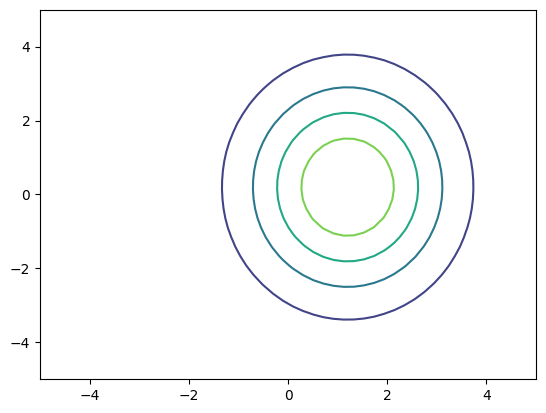

In [63]:
import matplotlib.pyplot as plt
import numpy as np

def gauss2D(x, m, C):
    Ci = np.linalg.inv(C)
    dC = np.linalg.det(C1)
    num = np.exp(-0.5 * np.dot((x-m).T, np.dot(Ci, (x-m))))
    den = 2 * np.pi * dC
    return num/den

def twoDGaussianPlot (nx, ny, m, C):
    x = np.linspace(-5, 5, nx)
    y = np.linspace(-5, 5, ny)
    X, Y = np.meshgrid(x, y, indexing='ij')
    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])
            Z[i,j] = gauss2D(xvec, m, C)
    return X, Y, Z

# Plot contours
#
nx, ny = 50, 40
m1 = np.array([1.2,0.2])
C1 = np.array([[2,0], [0,4]], np.float32)
Xp, Yp, Zp = twoDGaussianPlot (nx, ny, m1, C1)
plt.contour(Xp, Yp, Zp, 5)

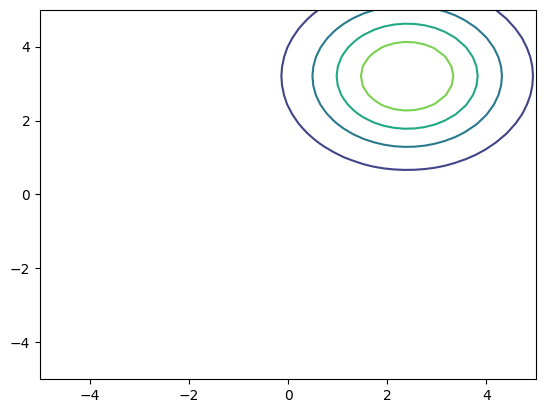

In [82]:
import matplotlib.pyplot as plt
import numpy as np

def gauss2D(x, m, C):
    Ci = np.linalg.inv(C)
    dC = np.linalg.det(C1)
    num = np.exp(-0.5 * np.dot((x-m).T, np.dot(Ci, (x-m))))
    den = 2 * np.pi * dC
    return num/den

def twoDGaussianPlot (nx, ny, m, C):
    x = np.linspace(-5, 5, nx)
    y = np.linspace(-5, 5, ny)
    X, Y = np.meshgrid(x, y, indexing='ij')
    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])
            Z[i,j] = gauss2D(xvec, m, C)
    return X, Y, Z

# Plot contours
#
nx, ny = 50, 40
m1 = np.array([2.4,3.2])
C1 = np.array([[2,0], [0,2]], np.float32)
Xp, Yp, Zp = twoDGaussianPlot (nx, ny, m1, C1)
plt.contour(Xp, Yp, Zp, 5)

## 4 Sampling from a multi-variate Gaussian

[[2. 1.]
 [1. 2.]]
(2000, 2)
(2000, 2)


(-6.0, 6.0)

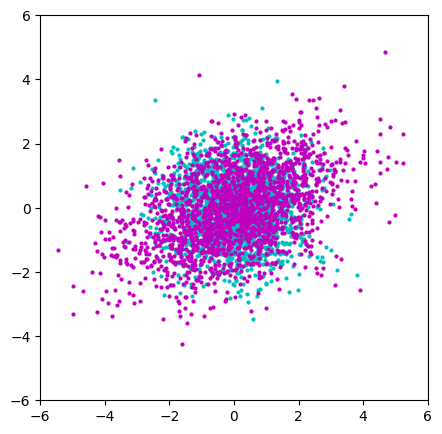

In [74]:
import matplotlib.pyplot as plt
import numpy as np


C = np.array([[2.0,1.0], [1.0,2]])
A = np.linalg.cholesky(C) # The Cholesky decomposition decomposes a symmetric positive definite matrix C into the product of a lower triangular matrix A and 
                          # its conjugate transpose (or simply its transpose if C is real).
print(A @ A.T)

X = np.random.randn(2000,2)
Y = X @ A
print(X.shape)
print(Y.shape)

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X[:,0], X[:,1], c="c", s=4)
ax.scatter(Y[:,0], Y[:,1], c="m", s=4)
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)



Plotting both X and Y can provide insights into how the Cholesky transformation affects the original data
By looking at the graph we can get a understanding about correlation between the X and Y
By seeing the clusters or patterns represented in the original data X, we can observe how those clusers transformed in Y
And we can see the outliers in both X and Y

## 5 Distribution of Projections

The vector:  [0.8660254037844386, 0.5000000000000001]
Magnitude :  1.0
Angle :  59.99999999999999
[ 0.97427909 -0.53829717 -2.43461311 ... -1.77917605  0.55681143
 -1.02508387]
(2000,)
Projected variance:  3.094442876770413
Maximum variance: 3.0969115910485394
Minimum variance: 1.039447223446689


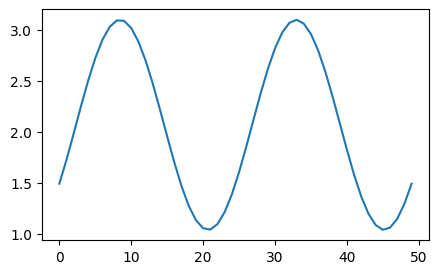

In [104]:
import matplotlib.pyplot as plt
import numpy as np

theta = np.pi/3
u = [np.sin(theta), np.cos(theta)]
print("The vector: ", u)
print("Magnitude : ", np.sqrt(u[0]**2 + u[1]**2))
print("Angle : ", theta*180/np.pi)

yp = Y @ u
print(yp)
print(yp.shape)
print("Projected variance: ", np.var(yp))

# Store projected variances in pVars & plot
#
nPoints = 50
pVars = np.zeros(nPoints)
thRange = np.linspace(0, 2*np.pi, nPoints)
for n in range(nPoints):
   theta = thRange[n]
   u = [np.sin(theta), np.cos(theta)]
   pVars[n] = np.var(Y @ u)
fig, ax = plt.subplots(figsize=(5,3))
ax.plot(pVars)

max_var = np.max(pVars)
min_var = np.min(pVars)

print("Maximum variance:", max_var)
print("Minimum variance:", min_var)


Compute the eigenvalues an eigenvectors of the covariance matrix C

In [111]:
import numpy as np

# Covariance matrix C
C = np.cov(Y.T)



NameError: name 'T' is not defined

Can you see a relationship between the eignevalues and eigenvectors and the maxima and
minima of the way the projected variance changes?
Higher eigenvalues indicate higher variances, while lower eigenvalues indicate lower variances.
The eigenvectors of the covariance matrix represent the directions of maximum variance (principal components) in the dataset. Each eigenvector corresponds to a direction in the dataset space, and its magnitude represents the extent of the spread of the data along that direction.